In [1]:
import latent_calendar
import pandas as pd

In [3]:
#base_df = pd.read_excel("base-data.xlsx")
file_name = "base-data.xlsx"
#exploring_actor_vial_df = pd.read_excel(io=file_name, sheet_name='ACTOR_VIAL')
#exploring_vehiculos_df = pd.read_excel(io=file_name, sheet_name='VEHICULOS')

siniestros_df = pd.read_excel(io=file_name, sheet_name='SINIESTROS')
hipothesis_df = pd.read_excel(io=file_name, sheet_name='HIPOTESIS')

# Combining Dataframes
see: https://datacarpentry.org/python-ecology-lesson/05-merging-data.html

It appears (from looking at the data in excel) that diniestros and hipothesis are the only two datapoints that are 1-1, whereas the others are metadata about each car crash.

In [4]:
siniestros_df["CODIGO_ACCIDENTE"].nunique()

196152

In [5]:
hipothesis_df["CODIGO_ACCIDENTE"].nunique()

195735

In [6]:
common_keys = ['CODIGO_ACCIDENTE','FECHA']

In [5]:
merged_inner = pd.merge(left=siniestros_df, right=hipothesis_df, left_on=common_keys, right_on=common_keys)

NameError: name 'siniestros_df' is not defined

In [4]:
merged_inner["datetime"] = pd.to_datetime(merged_inner["FECHA"].str.cat(merged_inner["HORA"], sep=" "), format="mixed")

NameError: name 'merged_inner' is not defined

<Axes: xlabel='datetime'>

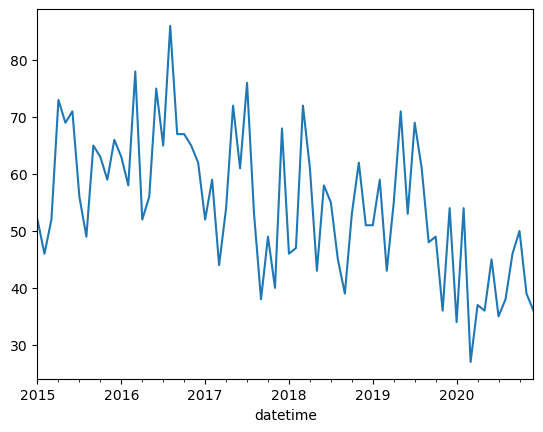

In [131]:
(
    merged_inner
    .groupby([pd.Grouper(key="datetime", freq="M"), "GRAVEDAD"])
    .size()
    .unstack()
    .iloc[-52 * 2:]
    .assign(ratio=lambda df: df[1] / (df[1]+ df[2] + df[3]))
    .loc[:, 1]
    .plot()
)

In [26]:
merged_inner["DIRECCION"].value_counts()

DIRECCION
KR 80-CL 2 51                         253
AV AVENIDA BOYACA-CL 80 02            183
AV AVENIDA CIUDAD DE CALI-CL 26 02    172
CL 13-KR 72 02                        170
AV AVENIDA BOYACA-CL 13 02            168
                                     ... 
KR 21-CL 145A 02                        1
CL 145-KR 99B 02                        1
CL 58A-KR 49A S 69                      1
CL 170-KR 93 02                         1
CL 142 - KR 146  02                     1
Name: count, Length: 92369, dtype: int64

In [54]:
df_location.sum(axis=1).pipe(lambda ser: ser / ser.sum())

GRAVEDAD
1    0.016846
2    0.353513
3    0.629641
dtype: float64

In [1]:
df_location = merged_inner.cal.aggregate_events("DIRECCION", "datetime")

# df_location.cal.normalize("max").cal.sum_over_vocab("hour").T.plot()

NameError: name 'merged_inner' is not defined

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


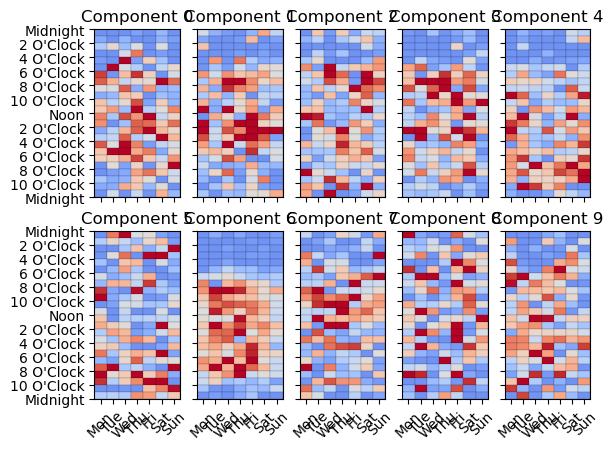

In [69]:
model = LatentCalendar(n_components=10, n_jobs=-1)

df_model = df_location.loc[df_location.sum(axis=1) > 25]
model.fit(df_model)

plot_model_components(model)

In [29]:
from latent_calendar import LatentCalendar 
from latent_calendar.plot import plot_model_components

In [7]:
(merged_inner.query("CODIGO_ACCIDENTE == 4401444"))

,CODIGO_ACCIDENTE,FECHA,HORA,GRAVEDAD,CLASE,CHOQUE,OBJETO_FIJO,DIRECCION,CODIGO_LOCALIDAD,DISENO_LUGAR,CODIGO_CAUSA
157,4401444,04/01/2015,16:00:00,2,1,1.0,NaN,KR 45A-CL 131 02,11,2,112
158,4401444,04/01/2015,16:00:00,2,1,1.0,NaN,KR 45A-CL 131 02,11,2,157


In [8]:
(hipothesis_df.query("CODIGO_ACCIDENTE == 4401444"))

,CODIGO_ACCIDENTE,FECHA,CODIGO_CAUSA
131,4401444,04/01/2015,112
132,4401444,04/01/2015,157


# Trying to match them together

We can pre-process hipothesis to have lists of codigo causa instead of multiple row

In [84]:
hipothesis_df.head(10).groupby("FECHA").agg(lambda x: x.tolist())

,CODIGO_ACCIDENTE,CODIGO_CAUSA
FECHA,,
01/01/2015,"[4401425, 4401437, 4401453, 4401423, 4401430, ...","[115, 104, 157, 112, 157, 139, 116, 121, 157, ..."


In [102]:
#https://stackoverflow.com/questions/46275765/pandas-merge-row-data-with-multiple-values-to-python-list-for-a-column
#grouped_hipothesis_df = hipothesis_df.groupby(['CODIGO_ACCIDENTE','FECHA']).agg(lambda x: x.tolist())#.apply(lambda x: 12, axis = 1, result_type= "expand")
#grouped_hipothesis_df
def tiny(series, n=4):
    l =  series.tolist()
    while len(l) < n: # n magic number
        l.append(-1)
        
    return l
#hdf = hipothesis_df.query("CODIGO_ACCIDENTE == 10535475").groupby(['CODIGO_ACCIDENTE','FECHA']).agg(tiny)#.apply(lambda x: x + 4, axis = 1, result_type= "expand")
#hdf[['cc1','cc2','cc3','cc4','cc5','cc6','cc7']] = pd.DataFrame(hdf.CODIGO_CAUSA.tolist(), index= hdf.index)
#hdf


In [90]:
hipothesis_df.groupby("CODIGO_ACCIDENTE").size().sort_values().value_counts(normalize=True)

1    0.818535
2    0.170046
3    0.009825
4    0.001528
5    0.000051
7    0.000010
6    0.000005
Name: proportion, dtype: float64

In [103]:
grouped_hipothesis_df = hipothesis_df.drop_duplicates().groupby(['CODIGO_ACCIDENTE','FECHA']).agg(tiny)

In [104]:
grouped_hipothesis_df.query("CODIGO_ACCIDENTE == 4508250")

,,CODIGO_CAUSA
CODIGO_ACCIDENTE,FECHA,
4508250,11/02/2018,"[116, 141, -1, -1]"


In [97]:
for i in grouped_hipothesis_df.CODIGO_CAUSA.tolist():
    if len(i) > 4: 
        print(i)

[139, 302, 116, 121, 301]


In [98]:
grouped_hipothesis_df[['CC1','CC2','CC3','CC4','CC5']] = pd.DataFrame(grouped_hipothesis_df.CODIGO_CAUSA.tolist(), index= grouped_hipothesis_df.index)


In [101]:
grouped_hipothesis_df.query("CC5 > 0")

,,CODIGO_CAUSA,CC1,CC2,CC3,CC4,CC5
CODIGO_ACCIDENTE,FECHA,,,,,,
4491301,22/08/2017,"[139, 302, 116, 121, 301]",139,302,116,121,301.0


In [66]:
merged_inner = pd.merge(left=siniestros_df, right=grouped_hipothesis_df, left_on=common_keys, right_on=common_keys)

In [2]:
merged_inner

NameError: name 'merged_inner' is not defined

In [ ]:
grouped_hipothesis_df = hipothesis_df.groupby(['CODIGO_ACCIDENTE','FECHA']).agg(lambda x: x.tolist())


# Using Google Maps

In [ ]:
latent_calendar